In [57]:
import config
from oandapyV20 import API
import oandapyV20.endpoints.instruments as instruments


In [58]:
# Setup OANDA connection
client = API(access_token=config.OANDA_API_KEY)

In [59]:
# define variables
timeframe = "M15"
instrument = "GBP_JPY" #british pound to japanese yen

In [60]:
#Get Candle Data
def get_candles (tf):
    #Ask for the price and set the timeframe
    params = {
        "granularity": tf,
        "price" : "A" 
    }

    r = instruments.InstrumentsCandles(instrument=instrument, params=params)
    candles = client.request(r)['candles']

    #parse through data

    data = []

    for c in candles:
        if c["complete"]:
            data.append(
                {
                    "time": c["time"],
                    "open": float(c["ask"]["o"]),
                    "high": float(c["ask"]["h"]),
                    "low": float(c["ask"]["l"]),
                    "close": float(c["ask"]["c"]),
                }
            )
    #and use pandas for better representation

    df = pd.DataFrame(data)
    df["time"] = pd.to_datetime(df["time"]) 

    return df

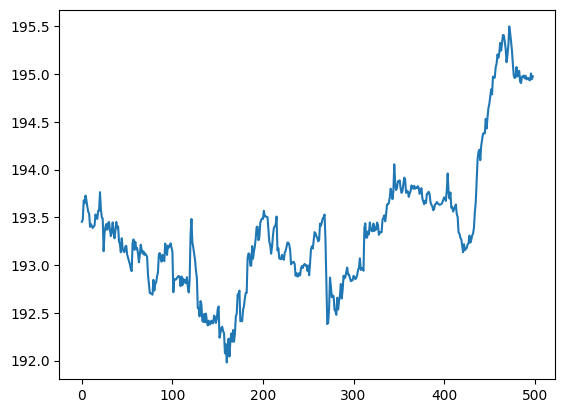

In [ ]:
#Visualize the chart using matplot to ensure its working
import matplotlib.pyplot as plt
plt.plot(df['close'])
plt.show()

In [62]:
#call the candlestick function and set it to the price variable
price = get_candles(timeframe)
price

,time,open,high,low,close
0,2025-05-20 16:00:00+00:00,193.497,193.533,193.387,193.454
1,2025-05-20 16:15:00+00:00,193.456,193.562,193.451,193.477
2,2025-05-20 16:30:00+00:00,193.477,193.692,193.476,193.679
3,2025-05-20 16:45:00+00:00,193.681,193.693,193.635,193.648
4,2025-05-20 17:00:00+00:00,193.647,193.729,193.638,193.728
...,...,...,...,...,...
494,2025-05-27 19:30:00+00:00,194.958,194.961,194.926,194.940
495,2025-05-27 19:45:00+00:00,194.941,194.950,194.882,194.936
496,2025-05-27 20:00:00+00:00,194.930,195.021,194.895,195.008
497,2025-05-27 20:15:00+00:00,195.009,195.037,194.941,194.948
